In [1]:
#TOPIC
#Common tricks to handle categorical data and preprocess it to build machine learning models!

In [2]:
#Categorical features can only take on a limited, and usually fixed, number of possible values. 
# The features where the categories are only labeled without any order of precedence are called nominal features.

In [3]:
#CHALLENGES
#Categorical features may have a very large number of levels, known as high cardinality
#Many machine learning models, such as regression or SVM, are algebraic. Therefore the input must be numerical.
#Some ML packages or libraries might transform categorical to numeric automatically but many ML packages don't.
#There are only few tolerant algorithms to deal with Label Noise

In [4]:
#Importing reqired Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
%matplotlib inline

In [5]:
#Importing the dataset
dataset= pd.read_csv('Data.csv')
X= dataset.iloc[:, :-1].values
y= dataset.iloc[:, 3].values
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [6]:
#Taking care of missing values
from sklearn.preprocessing import Imputer
imputer= Imputer(missing_values= 'NaN', strategy= 'mean', axis= 0)
imputer= imputer.fit(X[:, 1: 3])
X[:, 1:3]= imputer.transform(X[:, 1:3])
X

/home/msc2/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 60590.90909090909],
       ['France', 35.0, 58000.0],
       ['Spain', 39.0, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0],
       ['Spain', 45.0, 50000.0],
       ['Spain', 35.0, 42500.0]], dtype=object)

In [7]:
#EXPLORATORY DATA ANALYSIS

#Some information about different columns in the DataFrame
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
Country      12 non-null object
Age          11 non-null float64
Salary       11 non-null float64
Purchased    12 non-null object
dtypes: float64(2), object(2)
memory usage: 512.0+ bytes
None


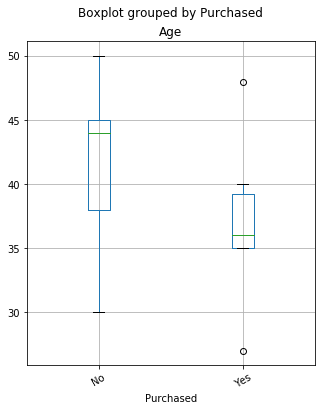

In [8]:
dataset.boxplot('Age','Purchased',rot = 30,figsize=(5,6))

In [9]:
categorical_dataset = dataset.select_dtypes(include=['object']).copy()
categorical_dataset.head()

,Country,Purchased
0,France,No
1,Spain,Yes
2,Germany,No
3,Spain,No
4,Germany,Yes


In [10]:
#One of the most common data pre-processing steps is to check for null values in the dataset. 
print(categorical_dataset.isnull().values.sum())

0


In [11]:
#Checking the column-wise distribution of null values
print(categorical_dataset.isnull().sum())

Country      0
Purchased    0
dtype: int64


In [12]:
#Frequency distribution of categories within the feature
print(categorical_dataset['Country'].value_counts())

Spain      5
France     4
Germany    3
Name: Country, dtype: int64


In [13]:
#Count of distinct categories within the feature
print(categorical_dataset['Country'].value_counts().count())

3


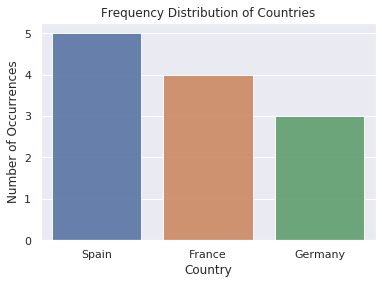

In [14]:
#VISUAL EXPLORATION

#Frequency distribution of a categorical feature using the seaborn package
#Frequency distribution of "Country" column
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
Country_count= categorical_dataset['Country'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Country_count.index, Country_count.values, alpha=0.9)
plt.title('Frequency Distribution of Countries')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

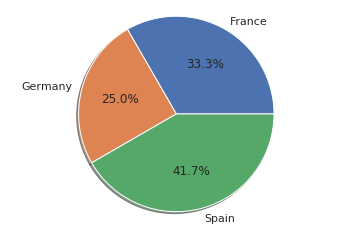

In [15]:
#Pie chart with the matplotlib library
labels = categorical_dataset['Country'].astype('category').cat.categories.tolist()
counts = categorical_dataset['Country'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [16]:
#ENCODING CATEGORICAL DATA
# 1.  Replacing values
# 2.  Encoding labels
# 3.  One-Hot encoding
# 4.  Binary encoding
# 5.  Backward difference encoding
# 6.  Miscellaneous features

In [17]:
#REPLACE VALUES

#Creating a dictionary which contains mapping numbers for each category
replace_map = {'Country': {'France': 0, 'Germany': 1, 'Spain': 2}}

#Note: Defining a mapping via a hard coded dictionary is easy when the number of categories is low

In [18]:
#We can achieve the same mapping with the help of dictionary comprehensions
labels = categorical_dataset['Country'].astype('category').cat.categories.tolist()
replace_map_comp = {'Country' : {k: v for k,v in zip(labels,list(range(0,len(labels))))}}

print(replace_map_comp)

{'Country': {'France': 0, 'Germany': 1, 'Spain': 2}}


In [19]:
#Use replace() function on the Dataset by passing the mapping dictionary as argument
categorical_dataset_replace = categorical_dataset.copy()
categorical_dataset_replace.replace(replace_map_comp, inplace=True)

print(categorical_dataset_replace)

    Country Purchased
0         0        No
1         2       Yes
2         1        No
3         2        No
4         1       Yes
5         0       Yes
6         2        No
7         0       Yes
8         1        No
9         0       Yes
10        2        No
11        2       Yes


In [20]:
print(categorical_dataset_replace['Country'].dtypes)

int64


In [21]:
#It's a good practice to typecast categorical features to a category dtype because they make the operations 
#on such columns much faster than the object dtype

categorical_dataset_Label_encoding = dataset.copy()
categorical_dataset_Label_encoding['Country'] = categorical_dataset_Label_encoding['Country'].astype('category')
categorical_dataset_Label_encoding['Purchased'] = categorical_dataset_Label_encoding['Purchased'].astype('category')                                                              

print(categorical_dataset_Label_encoding.dtypes)

Country      category
Age           float64
Salary        float64
Purchased    category
dtype: object


In [22]:
#LABEL ENCODING: allows you to convert each value in a column to a number
#Numerical labels are always between 0 and n_categories-1

categorical_dataset_Label_encoding['Country'] = categorical_dataset_Label_encoding['Country'].cat.codes
categorical_dataset_Label_encoding 

,Country,Age,Salary,Purchased
0,0,44.0,72000.0,No
1,2,27.0,48000.0,Yes
2,1,30.0,54000.0,No
3,2,38.0,61000.0,No
4,1,40.0,NaN,Yes
5,0,35.0,58000.0,Yes
6,2,NaN,52000.0,No
7,0,48.0,79000.0,Yes
8,1,50.0,83000.0,No
9,0,37.0,67000.0,Yes


In [23]:
#Sometimes, you might just want to encode a bunch of categories within a feature to some numeric value 
#and encode all the other categories to some other numeric value.

categorical_dataset_specific=categorical_dataset.copy()
categorical_dataset_specific['Country'] = np.where(categorical_dataset_specific['Country'].str.contains('France'), 1, 0)

categorical_dataset_specific

,Country,Purchased
0,1,No
1,0,Yes
2,0,No
3,0,No
4,0,Yes
5,1,Yes
6,0,No
7,1,Yes
8,0,No
9,1,Yes


In [24]:
#The same label encoding can be acheived using scikit-learn's LabelEncoder:
categorical_dataset_sklearn = categorical_dataset.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
categorical_dataset_sklearn['Country'] = lb_make.fit_transform(categorical_dataset['Country'])

categorical_dataset_sklearn

,Country,Purchased
0,0,No
1,2,Yes
2,1,No
3,2,No
4,1,Yes
5,0,Yes
6,2,No
7,0,Yes
8,1,No
9,0,Yes


In [25]:
#Label Encoding has the  disadvantage that the numerical values can be misinterpreted by the algorithm. 
#Should the Country Spain encoded as 2 be given more weightage than Country France encoded as 0

In [26]:
#ONE HOT ENCODING

#Encoding the categorical variable by dummy encoding
#Where a table is created to represent the variable with one column for each category and a row 

#For each example in the dataset, one-value is added in the column for the categorical value for a given row
#And a zero-value is added to all other columns

#There are many libraries that support one-hot encoding but the simplest one is pandas.get_dummies() method.

categorical_dataset_one_hot_encoding = categorical_dataset.copy()
categorical_dataset_one_hot_encoding = pd.get_dummies(categorical_dataset_one_hot_encoding, columns=['Country'], prefix = ['Country'])

print(categorical_dataset_one_hot_encoding)

   Purchased  Country_France  Country_Germany  Country_Spain
0         No               1                0              0
1        Yes               0                0              1
2         No               0                1              0
3         No               0                0              1
4        Yes               0                1              0
5        Yes               1                0              0
6         No               0                0              1
7        Yes               1                0              0
8         No               0                1              0
9        Yes               1                0              0
10        No               0                0              1
11       Yes               0                0              1


In [27]:
#scikit-learn also supports one hot encoding via LabelBinarizer and OneHotEncoder in its preprocessing module

categorical_dataset_one_hot_encoding_sklearn = categorical_dataset.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
One_hot_encoding_results = lb.fit_transform(categorical_dataset_one_hot_encoding_sklearn['Country'])
One_hot_encoding = pd.DataFrame(One_hot_encoding_results, columns=lb.classes_)

print(One_hot_encoding)

    France  Germany  Spain
0        1        0      0
1        0        0      1
2        0        1      0
3        0        0      1
4        0        1      0
5        1        0      0
6        0        0      1
7        1        0      0
8        0        1      0
9        1        0      0
10       0        0      1
11       0        0      1


In [28]:
#Note:One_hot_encoding_ resulted in a new DataFrame with only the one hot encodings for the feature Country
#Therefore we must concatenate the result with the existing dataframe

result = pd.concat([categorical_dataset_one_hot_encoding_sklearn, One_hot_encoding], axis=1)
print(result)

    Country Purchased  France  Germany  Spain
0    France        No       1        0      0
1     Spain       Yes       0        0      1
2   Germany        No       0        1      0
3     Spain        No       0        0      1
4   Germany       Yes       0        1      0
5    France       Yes       1        0      0
6     Spain        No       0        0      1
7    France       Yes       1        0      0
8   Germany        No       0        1      0
9    France       Yes       1        0      0
10    Spain        No       0        0      1
11    Spain       Yes       0        0      1


In [29]:
#While one-hot encoding solves the problem of unequal weights given to categories within a feature, 
    #it is not very useful when there are many categories, as that will result in formation of as many new columns, 
    #which can result in the curse of dimensionality. 
#The concept of the “curse of dimensionality” discusses that 
    #in high-dimensional spaces some things just stop working properly.

In [30]:
#BINARY ENCODING
#This technique is not as intuitive as the previous ones. 

#1.  Categories are encoded as ordinal.
#2.  Integers are converted into binary code.
#3.  Digits from that binary string are split into separate columns. 

#This encodes the data in fewer dimensions than one-hot encoding.

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['Country'])
categorical_dataset_Binary_encoding = encoder.fit_transform(categorical_dataset)

categorical_dataset_Binary_encoding

,Country_0,Country_1,Country_2,Purchased
0,0,0,1,No
1,0,1,0,Yes
2,0,1,1,No
3,0,1,0,No
4,0,1,1,Yes
5,0,0,1,Yes
6,0,1,0,No
7,0,0,1,Yes
8,0,1,1,No
9,0,0,1,Yes


In [31]:
#Note: category_encoders is a very useful library for encoding categorical columns. 
#It supports one-hot, binary, label encoding and other advanced encoding methods like 
        #Helmert contrast, polynomial contrast, backward difference, etc.

In [32]:
#BACKWARD DIFFERENCE ENCODING

encoder = ce.BackwardDifferenceEncoder(cols=['Country'])
categorical_dataset_Backward_Difference = encoder.fit_transform(categorical_dataset)

categorical_dataset_Backward_Difference

,intercept,Country_0,Country_1,Purchased
0,1,-0.666667,-0.333333,No
1,1,0.333333,-0.333333,Yes
2,1,0.333333,0.666667,No
3,1,0.333333,-0.333333,No
4,1,0.333333,0.666667,Yes
5,1,-0.666667,-0.333333,Yes
6,1,0.333333,-0.333333,No
7,1,-0.666667,-0.333333,Yes
8,1,0.333333,0.666667,No
9,1,-0.666667,-0.333333,Yes


In [33]:
#MISCELLANEOUS FEATURES: Categorical feature columns which specify the ranges of values for observation points

Age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})
Age['start'], Age['end'] = zip(*Age['age'].map(lambda x: x.split('-')))

Age

,age,start,end
0,0-20,0,20
1,20-40,20,40
2,40-60,40,60
3,60-80,60,80


In [34]:
#Replacing the range with its mean
Age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})

def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

Age['age_mean'] = Age['age'].apply(lambda x: split_mean(x))

Age

,age,age_mean
0,0-20,10.0
1,20-40,30.0
2,40-60,50.0
3,60-80,70.0
